#### FIND FRPS

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
import seaborn as sns
import pylab as py
import matplotlib.dates as matdates

# Read Spider FRP CSV file
summary_filename = 'Metazygia wittfeldae summary'
summary_df = pd.read_csv(frp_filename + '.csv')

# Extract FRP values for each spider
frp_df = summary_df.iloc[29:58, 5]
frp_values = frp_df.values.tolist()

summary_df = summary_df[(summary_df['Conditions'] == 'DD') & (summary_df['Spider ID'].str.match('Monitor 1'))]
frp_df = summary_df[['Spider ID', 'LombSc period']]

frp_df

,Spider ID,LombSc period
29,Monitor 1 Spider 1,22.011150
30,Monitor 1 Spider 2,21.316001
31,Monitor 1 Spider 3,24.453386
32,Monitor 1 Spider 4,24.676897
33,Monitor 1 Spider 5,21.316001
34,Monitor 1 Spider 6,22.283665
35,Monitor 1 Spider 7,18.760847
36,Monitor 1 Spider 8,23.242881
37,Monitor 1 Spider 9,23.806503
38,Monitor 1 Spider 10,22.897901


In [55]:
### find subjective days list for 1 spider
filename = 'Metazygia wittfeldae Monitor 1 Updated_DD'
df = pd.read_csv(filename + '.csv', index_col = 0)
df.index = pd.to_datetime(df.index)

# Read spider activity CSV file
def split_subjective_days(df, initial_day, frp):
    # Get day where lights would turn on but they don't (DD)
    df_start = df.at_time('07:00:00')
    idx = df_start.index[0]
    
    # Subjective days starting from lights not being turned on to given FRP
    dti = pd.date_range(idx, periods = 10, freq = frp)
    dti = dti.round(freq = '1T')
    
    return dti

dti = split_subjective_days(df, idx, str(frp_values[0]) + 'H')

day_starts = list(dti)
day_starts

[Timestamp('2017-04-26 07:00:00'),
 Timestamp('2017-04-27 05:01:00'),
 Timestamp('2017-04-28 03:01:00'),
 Timestamp('2017-04-29 01:02:00'),
 Timestamp('2017-04-29 23:03:00'),
 Timestamp('2017-04-30 21:03:00'),
 Timestamp('2017-05-01 19:04:00'),
 Timestamp('2017-05-02 17:05:00'),
 Timestamp('2017-05-03 15:05:00'),
 Timestamp('2017-05-04 13:06:00')]

In [33]:
df = df.drop('Light', axis = 1)

In [34]:
df

,Monitor 1 Spider 1,Monitor 1 Spider 2,Monitor 1 Spider 3,Monitor 1 Spider 4,Monitor 1 Spider 5,Monitor 1 Spider 6,Monitor 1 Spider 7,Monitor 1 Spider 8,Monitor 1 Spider 9,Monitor 1 Spider 10,...,Monitor 1 Spider 21,Monitor 1 Spider 23,Monitor 1 Spider 25,Monitor 1 Spider 26,Monitor 1 Spider 27,Monitor 1 Spider 28,Monitor 1 Spider 29,Monitor 1 Spider 30,Monitor 1 Spider 31,Monitor 1 Spider 32
Date-Time,,,,,,,,,,,,,,,,,,,,,
2017-04-26 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,9,7,0
2017-04-26 00:01:00,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,6
2017-04-26 00:02:00,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8,3,6
2017-04-26 00:03:00,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,9,11,0
2017-04-26 00:04:00,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-05-04 23:55:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-05-04 23:56:00,0,0,0,0,0,0,0,0,0,0,...,5,0,0,0,0,0,0,0,0,0
2017-05-04 23:57:00,0,0,0,0,0,0,0,0,0,0,...,5,0,0,0,0,0,0,0,0,0


In [49]:
#This function creates a list of dataframes for each date so that each date may be plotted individually
def create_list_of_df(df):
    #find all unique days
    all_days = np.unique(list(df.index.date))
    
    #create empty list to append to 
    bracket = []
    
    #loop through dataframe and create new df for every day
    for x in range(len(all_days)):
        bracket.append(df[df.index.date==all_days[x]])
        
    return bracket

In [43]:
#This function sets up the raster plot with subplots, adjusts the axes, and sets datetime for the x axis
def set_up_raster_plot(df, column_name):

    #create list of dataframes each containing a unique date which will be used to plot the data on the graph
    list_of_df = create_list_of_df(df)
    
    #find all unique days to make the y labels of the graph
    all_days = np.unique(list(df.index.date))
    
    #set up fig and axis with the number of subplots being the number of unique days, set figsize
    fig, axs = plt.subplots(nrows = len(list_of_df), sharey = True, figsize = (10, 13))
    
    #adjust space between subplots
    plt.subplots_adjust(hspace = 0)
    
    #set labels for the x and y axis on the graph, as well as title
    axs[-1].set_xlabel('Time of Day')
    axs[0].title.set_text('Activity for ' + str(column_name) + ' Throughout Each Day')
    
    #adjust ticks
    for x in range(len(axs)-1):
        axs[x].set_yticks([])
        axs[x].set_xticks([])
    
    #set up the x axis to have time of day 
    hour_locator = matdates.HourLocator(byhour = range(24), interval = 2)
    axs[-1].xaxis.set_major_locator(hour_locator)
    axs[-1].xaxis.set_major_formatter(matdates.DateFormatter('%H:%M'))
    
    return fig, axs, list_of_df, all_days

In [164]:
from datetime import datetime, timedelta
from itertools import compress

#This function plots the activity data on the raster plot, highlights the times where lights were off, and plots a line for activity onset
def plot_data_on_raster_plot(df, column_name, day_starts):
    
    #use function that set up raster plot to define fig and axs variables
    fig, axs, list_of_df, all_days = set_up_raster_plot(df, column_name)
    
    #set up boolean to determine when the same date contains multiple "subjective" days
    boolean_list = [True if day_starts[x].date() == day_starts[x+1].date() else False for x in range(len(day_starts)-1)]
    
    #apply boolean to original list 
    same_day = list(compress(day_starts, boolean_list))[0]
    
    #set up for loop that plots each day on each subplot
    for i in range(len(axs)):
        #plot each day
        axs[i].plot_date((list_of_df[i].index.values), list_of_df[i][column_name], color = 'black', linestyle = 'solid',
                        marker = 'None')
        
        #Make y labels the date
        axs[i].set_ylabel(all_days[i])
        
        #Set the margins
        axs[i].margins(x = 0.001)
        
        #placing line for start of subjective day
        if day_starts[i].date() < same_day.date():
            axs[i].axvline(x = day_starts[i], color = "red", linestyle = '--')
        
        elif day_starts[i].date() == day_starts[i+1].date():
            axs[i].axvline(x = day_starts[i], color = "red", linestyle = '--')
            axs[i].axvline(x = day_starts[i+1], color = "red", linestyle = '--')
            
        else:
            axs[i].axvline(x = day_starts[i+1], color = "red", linestyle = '--')
            
        #else:
            #axs[i].axvline(x = day_starts[i], color = "red", linestyle = '--')
            
        axs[i].axvspan(list_of_df[i].index[0], list_of_df[i].index[-1], alpha = 0.5, color = 'grey')
    #ignore warnings
    #plt.rcParams.update({'figure.max_open_warning': 0})
        
    #save the figure as a png file
    #plt.savefig(filename + ' ' + column_name + ' Raster Plot.png')

In [159]:
#print(day_starts[1].date())

boolean_list = [True if day_starts[x].date() == day_starts[x+1].date() else False for x in range(len(day_starts)-1)]

 
list(compress(day_starts, boolean_list))[0].date()


#day_starts[3].date() == day_starts[4].date()

#day_starts[True]
#[i for i, x in enumerate(day_starts) if x]

datetime.date(2017, 4, 29)

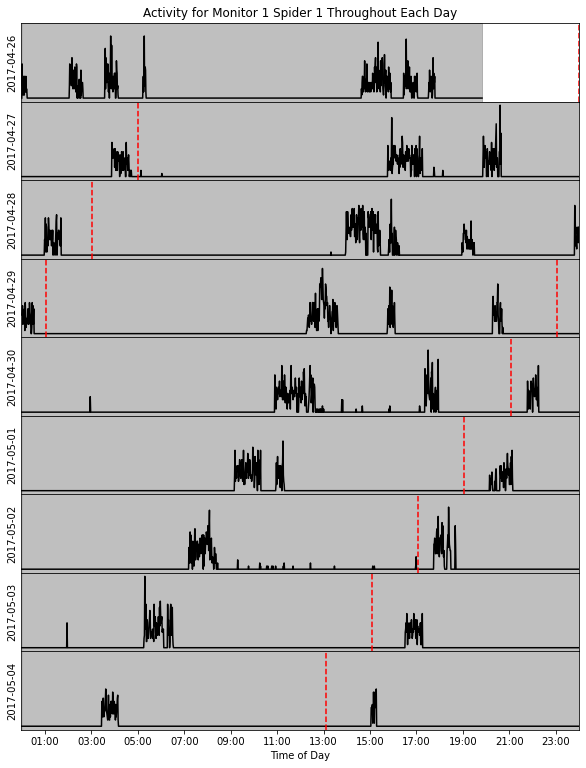

In [165]:
figure = plot_data_on_raster_plot(df, 'Monitor 1 Spider 1', day_starts)